<img style="float: left;width: 150px" src="http://www.mas.ncl.ac.uk/~nlfsr/Talks/201703_LorentzCenter/fig/newcastle_logo.png">
<img style="float: right;width: 165px" src="http://www.mas.ncl.ac.uk/~nlfsr/Talks/201703_LorentzCenter/fig/stfc_logo.png">
<br />
<br />
<br />
<br />
<center>

<img style="float: left;width: 95px" src="http://www.mas.ncl.ac.uk/~nlfsr/Talks/201703_LorentzCenter/fig/avatar.png">
# GalMag: a simple realistic model for the Galactic large-scale magnetic field #
<br /><br />


Luiz Felippe S. Rodrigues,  Anvar Shukurov, James Hollins and Paul Bushby


   

In [1]:
# Initial imports
%pylab inline
import galmag
from galmag.B_field import B_field
from galmag.analysis.visualization import plot_x_y_uniform, plot_x_z_uniform, plot_y_z_uniform, std_setup
from galmag.analysis.visualization import plot_r_z_uniform as plot_r_z
plot_x_y = plot_x_y_uniform 
plot_x_z = plot_x_z_uniform
plot_y_z = plot_y_z_uniform

std_setup() # Sets matplotlib's rc parameters (fonts, colors, sizes, etc)


Populating the interactive namespace from numpy and matplotlib


## Galactic dynamo # 

The form of the galactic magnetic field is not arbitrary, it must to obey the *mean* field dynamo equations:

\begin{equation}
% Sets up some LaTeX properties
\newcommand{bm}{\mathbf}
\newcommand{ar}{\rightarrow}
 \frac{\partial \bm{B}}{\partial t} =
        R_\alpha \nabla\times(\alpha\bm{B})
       +R_\omega\nabla\times(\bm{V}\times\bm{B})
       + \nabla^2\bm{B}\,.
\end{equation}

* $\bm{B} \ar$ the mean magnetic field in dimensionless units
* $R_\alpha \ar$ the magnetic Reynolds number associated with helical turbulence
* $R_\omega \ar$ the magnetic Reynolds number associated with velocity shear

### Strategy ##

* Disc and halo field components approached separately
* Solutions do the dynamo equations to be written as a series expansions
* Small(ish) number of *physical* parameters

### Software ###

* Where to find: https://bitbucket.org/luizfelippe/galmag
* Dependencies:
    - numpy
    - D20 (thanks Theo!)
* How to use it
    - Tutorial in jupyter-notebook in the repository
* License: 
    - GPL

## Disc field #

Assumptions for the disc field:
* A thin disc,
* Vacuum boundary conditions at $z=h(R)$,
* Quadrupolar symmetry.

From those assumptions, we find that the disc solution can be written as an expansion:

\begin{equation}
\left(
 \begin{array}{c}
  B_r    \\
  B_\phi \\
  B_z    \\
 \end{array}
\right) = \sum_{n=1}^{N_r} C_n\left(
 \begin{array}{c}
  B_r^{(n)}    \\
  B_\phi^{(n)} \\
  B_z^{(n)}    \\
 \end{array}
\right),
\end{equation}
where modes with larger $n$ have *smaller* growth rates

\begin{equation}
\Gamma_n = \gamma_0 -h_0^2\frac{\mu_n^2}{R_\text{disc}^4} \quad \text{with} \quad\mu_n \approx3.83, 7.02, 10.17,...
\end{equation}


### Disc field ###
The disc field modes follow:

\begin{align}
B_r^{(n)} =&\; R_\alpha J_1(k_n r)
          \times\left\{ \cos\left[\frac{\pi z}{2 h(r)}\right]
                       +\frac{3}{4\pi^{3/2}\sqrt{-D\,\Omega(r) S(r)}}
                                                    \cos\left[\frac{3\pi z}{2h(r)}\right]\right\}
\end{align}
<br />

\begin{equation}
B_\phi^{(n)} = - 2 J_1(k_n r)\sqrt{-\frac{D\,\Omega(r)S(r)}{\pi}}\cos\left[\frac{\pi z}{2h(r)}\right]
\end{equation}
<br />

\begin{equation}
B_z^{(n)} = -R_\alpha\frac{2 }{\pi} \times\left\{ J_1(k_n r) +\frac{1}{2}k_n r \left[J_0(k_n r)-J_2(k_n r)\right]\right\} \times \left\{\sin\left[\frac{\pi z}{2h(r)}\right]
    +\frac{1}{4\pi^{3/2}\sqrt{-D\,\Omega(r)S(r)}}
    \left[\sin\frac{3\pi z}{2h(r)}\right]\right\}
\end{equation}

### Disc field $-$ main parameters ###

GalMag allows one to quickly generate a realisation of the galactic magnetic field for a given choice of parameters on an specified grid. For the disc field the main parameters are:
* $D =R_{\alpha} R_{\omega}= \frac{h_0^3\alpha_0
S_\odot}{\eta^2} \ar$ `disk_dynamo_number` $\ar$ dynamo number, $D= R_\omega R_\alpha$. 
* $R_\alpha= \frac{h_0\alpha_0}{\eta} \ar$ `disk_turbulent_induction` $\ar$ Magnetic Reynolds number associated with helical turbulence
* $h_0 \ar$ `disk_height` $\ar$ disc scale-height at the solar radius, $h_\odot$.
* $R_\text{disc} \ar$ `disk_radius` $\ar$ radius of the dynamo active region of the disc.
* $C_n \ar$ `disk_modes_normalization` $\ar$ normalization of the modes

Other inputs (Python functions):
* Galaxy rotation curve
    - Default: Rotation curve of the Milky Way obtained by Clemens (1985) 
* Scale-height profile
    - Default: $h(R)=h_0\exp\left(\frac{R-R_\odot}{R_\text{HI}}\right)\,,$
    

### Disc field $-$ reversals ###

One either explicitly choose the $C_n$'s or specify known positions of reversals. E.g.

In [2]:
box_limits = [[-15, 15],[-15, 15],[-1.25, 1.25]] # kpc
box_resolution = [120,120,120]

B = B_field(box_limits, box_resolution)

B.add_disk_field(
    reversals=[3,10], # Requires 2 reversals at 4.7 kpc and 12.25
    B_phi_solar_radius = -3, # muG 
    number_of_modes = 4, # Number of radial modes
    disk_dynamo_number = -20,
    disk_turbulent_induction = 0.6,
    disk_height = 0.4, # kpc
    disk_radius =15
    )    

Which results in

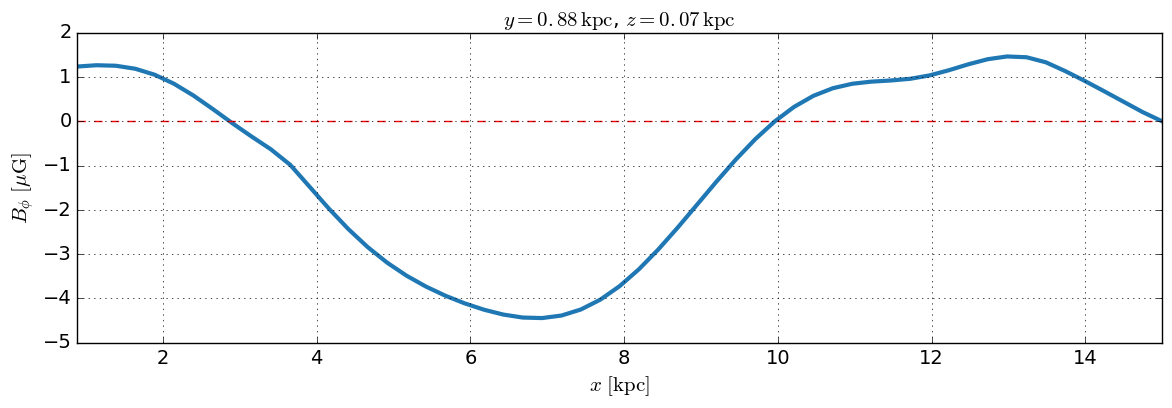

In [3]:
x = array(B.grid.x[63:,63,63]) # The conversion into a numpy array is
Bphi = array(B.phi[63:,63,63]) # someimes required to make matplotlib work.
y, z = B.grid.y[63,63,63], B.grid.z[63,63,63]

figure(figsize=(14,4))
plot(x, Bphi, ); plot(x,0*x,'r--', linewidth=1); xlim([x.min(),x.max()])
title(r'$y={0:.2f}\,\rm kpc$, $z={1:.2f}\,\rm kpc$'.format(y,z))
xlabel(r'$x\,\,[{\rm kpc}]$'); ylabel(r'$B_\phi\,\,[\mu{\rm G}]$'); grid()

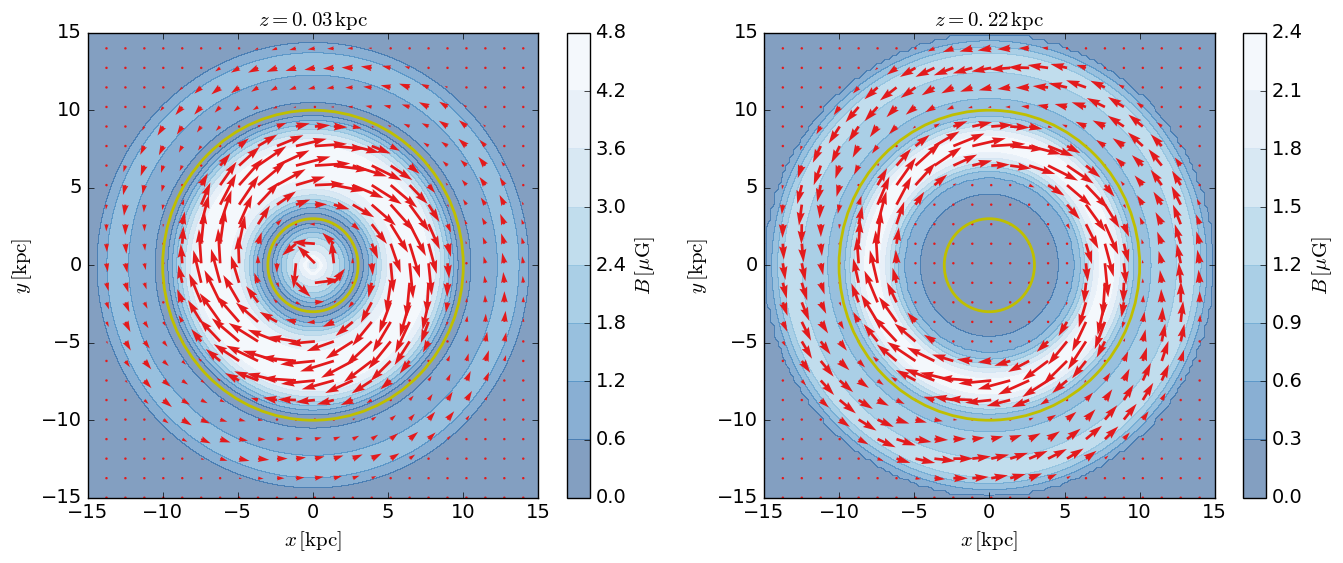

In [4]:
figure(figsize=(16,6.))
for i, iz in enumerate((61,70)):
    ax = subplot(1,2,i+1)
    title(r'$z={0:.2f}\,\rm kpc$'.format(B.grid.z[iz,iz,iz]))
    plot_x_y(B, iz=iz, field_lines=False, skipx=5, skipy=5, quiver_color='#e31a1c', width=0.006, cmap='Blues_r')
    ax.add_artist(Circle((0,0), 3, color= 'y', fill=False, linewidth=2))
    ax.add_artist(Circle((0,0),10, color= 'y', fill=False, linewidth=2))
savefig('fig/xy_2rev.png')


![xy_2rev.png](http://www.mas.ncl.ac.uk/~nlfsr/Talks/201703_LorentzCenter/fig/xy_2rev.png)

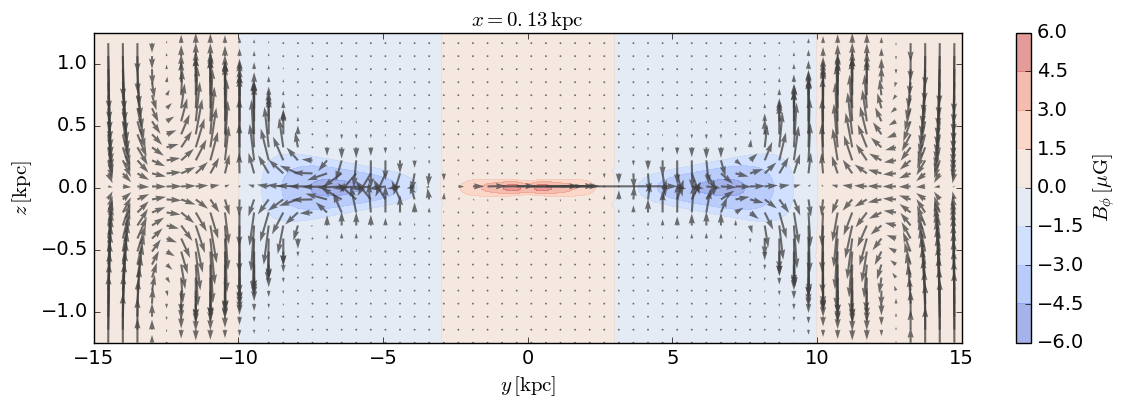

In [5]:
figure(figsize=(14,4))
title(r'$x={0:.2f}\,\rm kpc$'.format(B.grid.x[60,60,60]))
plot_y_z(B, ix=60, skipz=5, skipy=2, cmap='coolwarm')
savefig('fig/yz_2rev.png')


![yz_2rev.png](http://www.mas.ncl.ac.uk/~nlfsr/Talks/201703_LorentzCenter/fig/yz_2rev.png)

### Disc field $-$ another example ###

In [6]:
B.add_disk_field(
    reversals=[6.], # Requires a reversal at 6 kpc 
    B_phi_solar_radius = -3, # muG 
    number_of_modes = 2, # Minimum number of modes to be used
    disk_dynamo_number = -20,
    disk_turbulent_induction = 0.6,
    disk_height = 0.4, # kpc
    disk_radius =15
    )

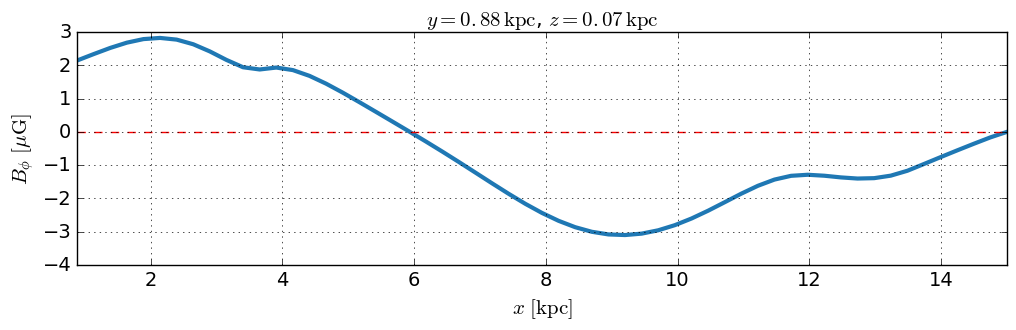

In [7]:
x = array(B.grid.x[63:,63,63]) # The conversion into a numpy array is sometimes
Bphi = array(B.phi[63:,63,63]) # required to make matplotlib work properly.
y, z = B.grid.y[63,63,63], B.grid.z[63,63,63]

figure(figsize=(12,3))
plot(x, Bphi, ); plot(x,0*x,'r--', linewidth=1); xlim([x.min(),x.max()])
title(r'$y={0:.2f}\,\rm kpc$, $z={1:.2f}\,\rm kpc$'.format(y,z))
xlabel(r'$x\,\,[{\rm kpc}]$'); ylabel(r'$B_\phi\,\,[\mu{\rm G}]$'); grid()
savefig('fig/Bphi_x_1rev.png')

![Bphi_x_1rev.png](http://www.mas.ncl.ac.uk/~nlfsr/Talks/201703_LorentzCenter/fig/Bphi_x_1rev.png)


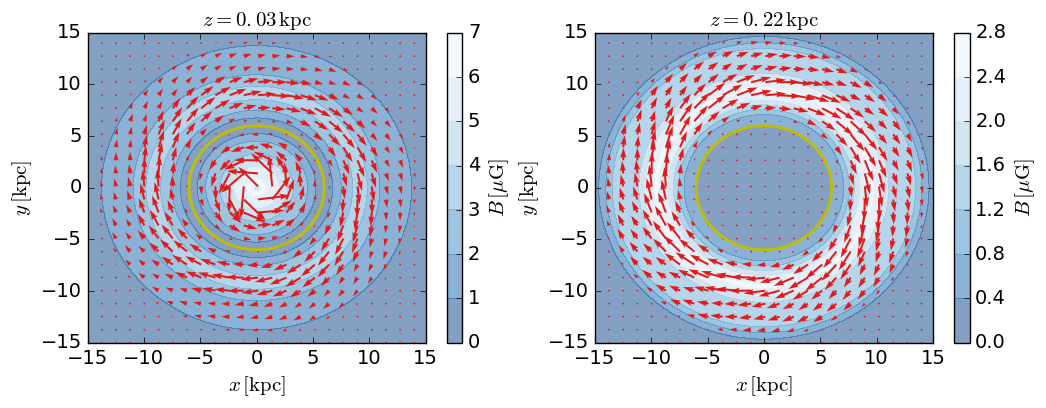

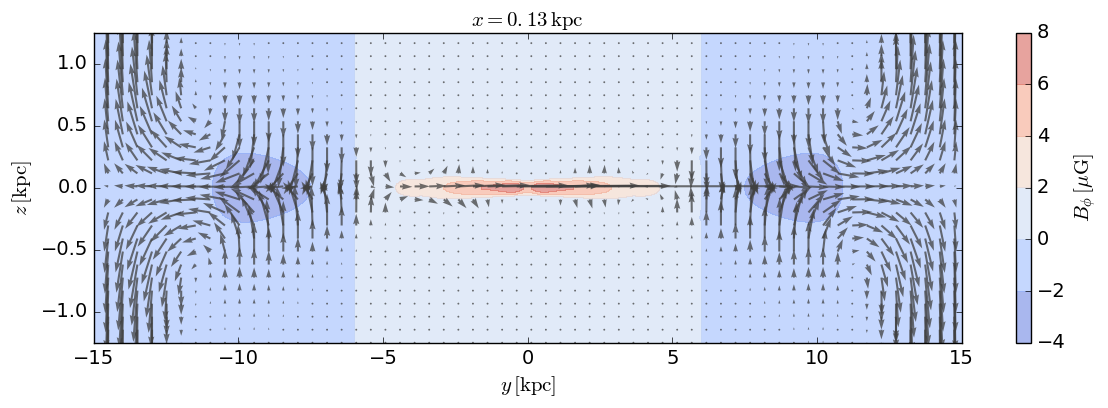

In [8]:
figure(figsize=(12,4.))
for i, iz in enumerate((61,70)):
    ax = subplot(1,2,i+1)
    title(r'$z={0:.2f}\,\rm kpc$'.format(B.grid.z[iz,iz,iz]))
    plot_x_y(B, iz=iz, field_lines=False, skipx=5, skipy=5, quiver_color='#e31a1c', width=0.006, cmap='Blues_r')
    ax.add_artist(Circle((0,0), 6, color= 'y', fill=False, linewidth=2))

savefig('fig/xy_1rev.png')

figure(figsize=(14,4))
title(r'$x={0:.2f}\,\rm kpc$'.format(B.grid.x[60,60,60]))
plot_y_z(B, ix=60, skipz=5, skipy=2, cmap='coolwarm')
savefig('fig/xz_1rev.png')


Single reversal

![xy_1rev.png](http://www.mas.ncl.ac.uk/~nlfsr/Talks/201703_LorentzCenter/fig/xy_1rev.png)
![xz_1rev.png](http://www.mas.ncl.ac.uk/~nlfsr/Talks/201703_LorentzCenter/fig/xz_1rev.png)


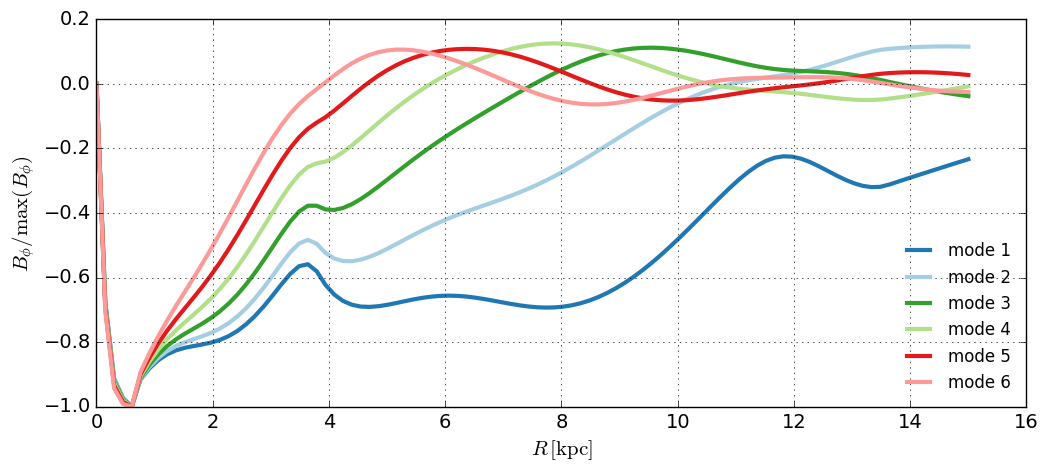

In [9]:
figure(figsize=(12,5))
box_limits = [[1e-8, 15],# r [kpc]
              [0,0], # phi
              [0,0]] # z [kpc]
box_resolution = [100,1,1] # No phi or z variation
Bcyl = B_field(box_limits, box_resolution, grid_type='cylindrical')

nmodes = 6

for i in range(nmodes):
    mode_norm = zeros((i+1))
    mode_norm[i]=1
    
    # Overwrites the disk field with another mode
    Bcyl.add_disk_field(disk_modes_normalization=mode_norm)
    
    x = array(Bcyl.grid.r_cylindrical[:,0,0])
    y = array(Bcyl.phi[:,0,0])
    plot(x,y/abs(y).max(), label='mode {}'.format(i+1))
    ylabel(r'$B_\phi/\max(B_\phi)$')
    xlabel(r'$R\,[{\rm kpc}]$')
legend(loc='lower right', frameon=False)
grid()
savefig('fig/Bmodes.png')

### Disc field $-$ modes ###

The rotation curve and flared disc make the shape of individual modes non-trivial

![Nice 3D figure](http://www.mas.ncl.ac.uk/~nlfsr/Talks/201703_LorentzCenter/fig/Bmodes.png)


Why the complicated shapes?

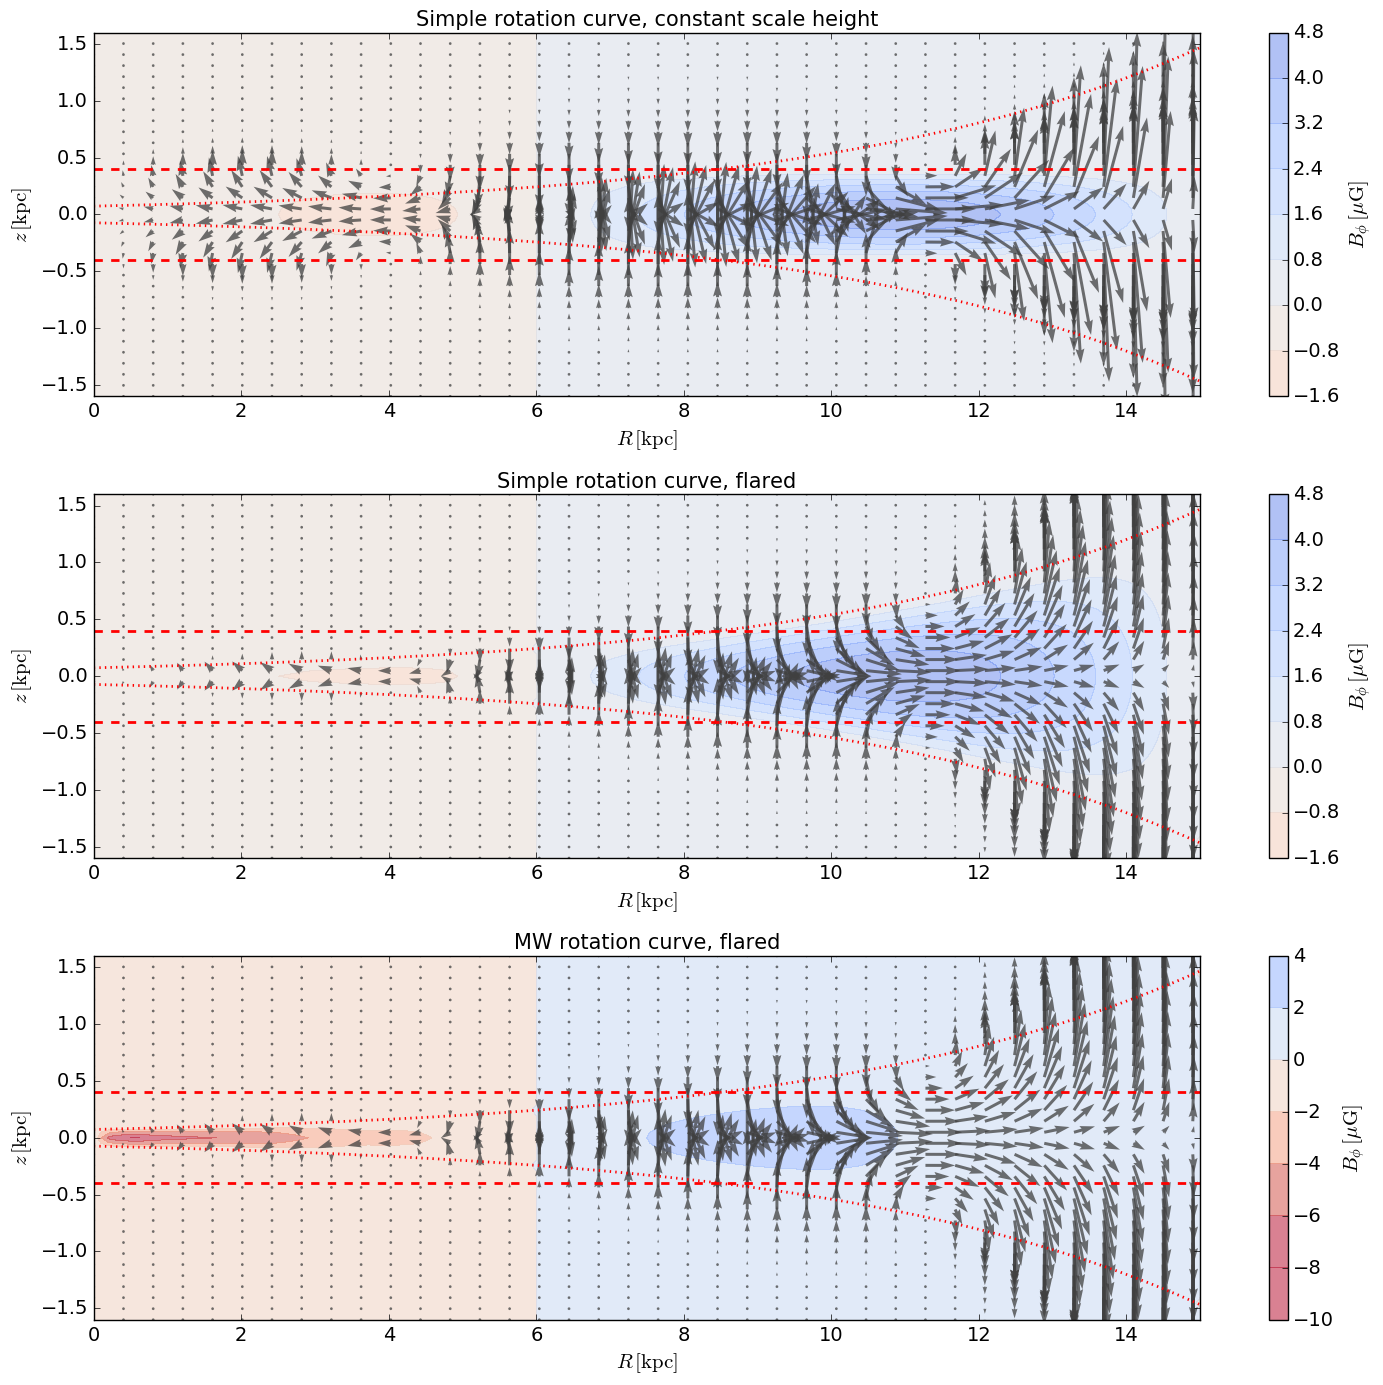

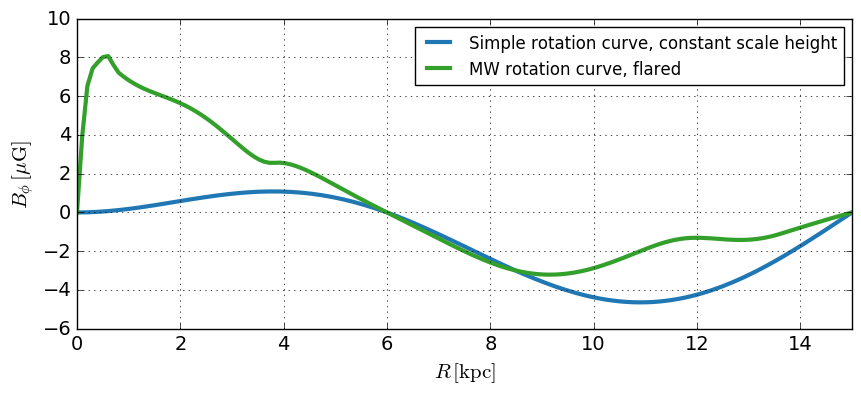

In [10]:
import galmag.disk_profiles as prof
reload(prof)
figure(figsize=(12,5))
box_limits = [[1e-9,15.],# r_cylindrical [kpc]
              [0,0], # phi
              [-1.6,1.6]] # z [kpc]
box_resolution = [150,1,67] # No phi variation

Bcyl = B_field(box_limits, box_resolution, grid_type='cylindrical')

std_params = dict(
    B_phi_solar_radius = -3, # muG 
    disk_dynamo_number = -20,
    disk_turbulent_induction = 0.6,
    disk_height = 0.4, # kpc
    disk_radius =15,
    disk_modes_normalization =[ 2.64346566, -0.36907576],
                                   disk_field_decay=True)

Bcyl.add_disk_field(name='Simple rotation curve, constant scale height', 
                 disk_rotation_function=prof.simple_rotation_curve,
                 disk_shear_function=prof.simple_shear_rate,
                 disk_height_function=prof.constant_scale_height,
                 **std_params)

Bcyl.add_disk_field(name='Simple rotation curve, flared', 
                 disk_rotation_function=prof.simple_rotation_curve,
                 disk_shear_function=prof.simple_shear_rate,
                 **std_params)

Bcyl.add_disk_field(name='MW rotation curve, flared',
                 **std_params)

figure(figsize=(15,14))
for i, x in enumerate(('Simple rotation curve, constant scale height',
                      'Simple rotation curve, flared',
                      'MW rotation curve, flared')):
    subplot(3,1,1+i)
    Bi = getattr(Bcyl,x)
    title(x)
    
    plot_r_z(Bi, cmap='coolwarm_r', skipr=4,skipz=2, vmin=-6, vmax=6, width=0.0027,)
    
    r = array(Bi.grid.r_cylindrical[:,0,0])
    
    plot(r, prof.constant_scale_height(r, h_d=Bi.parameters['disk_height']), color='r', linestyle='--', linewidth=2)
    plot(r, prof.constant_scale_height(r, h_d=-Bi.parameters['disk_height']), color='r', linestyle='--', linewidth=2)
    plot(r, prof.exponential_scale_height(r, h_d=B.parameters['disk_height']), color='r', linestyle=':', linewidth=2)
    plot(r, prof.exponential_scale_height(r, h_d=-B.parameters['disk_height']), color='r', linestyle=':', linewidth=2)
    

tight_layout()
savefig('fig/2d_rotation_curve_effect.png')

figure(figsize=(10,4))
for i, (x,c) in enumerate(zip(('Simple rotation curve, constant scale height',
                       'MW rotation curve, flared'),('#1f78b4','#33a02c'))):
    
    Bi = getattr(Bcyl,x)
    plot(array(Bi.grid.r_cylindrical[:,0,33]), array(Bi.phi[:,0,33]), 
         label=x, color=c)
grid()
xlabel(r'$R\,[\rm kpc]$')
ylabel(r'$B_\phi\,[\mu\rm G]$')
xlim([0,Bi.grid.r_cylindrical.max()])
legend()
savefig('fig/1d_rotation_curve_effect.png')




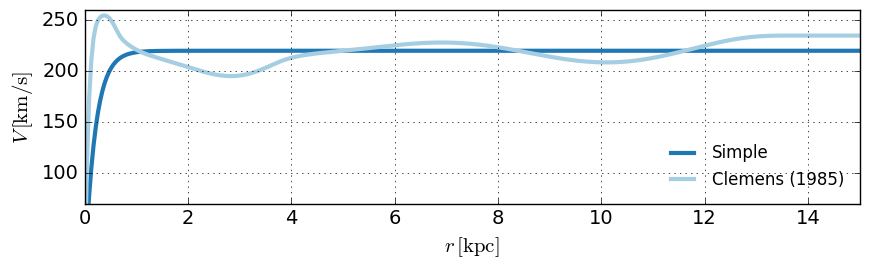

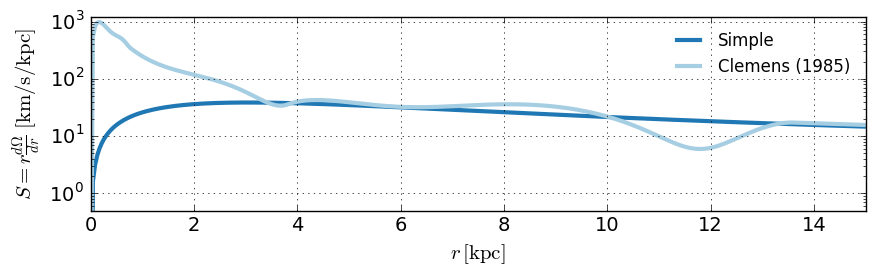

In [11]:
import galmag.disk_profiles as prof

figure(figsize=(10,2.5))

r = linspace(1e-7,15,350)
plot(r, prof.simple_rotation_curve(r, normalize=False), label='Simple')
plot(r, prof.Clemens_Milky_Way_rotation_curve(r, normalize=False), 
     label='Clemens (1985)')
legend(frameon=False, loc='lower right')
grid()
xlabel(r'$r\,[\rm kpc]$')
ylabel(r'$V\,[\rm km/s]$')
ylim([70,260])
xlim([0,15])
savefig('fig/compare_rotationcurve.png')
figure(figsize=(10,2.5))

#plot(r, prof.Clemens_Milky_Way_rotation_curve(r, normalize=False)/r, 
#     label=r'$\Omega$')
plot(r, -prof.simple_shear_rate(r, normalize=False), label=r'Simple')
plot(r, -prof.Clemens_Milky_Way_shear_rate(r, normalize=False), 
     label=r'Clemens (1985)')
grid()
xlabel(r'$r\,[\rm kpc]$')
ylabel(r'$S = r\frac{d\Omega}{dr}\;[\rm km/s/kpc]$')
#ylim([0,250])
xlim([0,15])
yscale('log'); ylim([0.5,1200])

legend(frameon=False, loc='upper right')
savefig('fig/compare_shear.png')
print

### Disc field - Effects of the rotation curve and scale-height

* How the rotation curve influences the solution?
* Compare the observed MW rotation curve with the simple model 
    $$ V(R) = [1-\exp(-R/R_*)] \times 220 \,\rm km/s $$
![Rotation curve comparison](http://www.mas.ncl.ac.uk/~nlfsr/Talks/201703_LorentzCenter/fig/compare_rotationcurve.png)

![Shear comparison](http://www.mas.ncl.ac.uk/~nlfsr/Talks/201703_LorentzCenter/fig/compare_shear.png)

For the same choice of parameters:
    
![Rotation curve 1D](http://www.mas.ncl.ac.uk/~nlfsr/Talks/201703_LorentzCenter/fig/1d_rotation_curve_effect.png)

And the scaleheight will also plays an important role
![1D rotation curve effect](http://www.mas.ncl.ac.uk/~nlfsr/Talks/201703_LorentzCenter/fig/2d_rotation_curve_effect.png)


![reversal study](http://www.mas.ncl.ac.uk/~nlfsr/Talks/201703_LorentzCenter/fig/Cn_reversals.png)

## Halo magnetic field ##

It is possible to write the halo dynamo solution as the expansion

$$
 \bm{B} = \exp(\Gamma t)\sum^{w_h}_{i=0}a_i\bm B_i^{(0)}
$$

in free decay modes,

$$
 \nabla^2\bm{B}_i^{(0)}=\gamma \bm{B}_i^{(0)}.
$$

The free decay modes in spherical geometry form a complete, orthonormal set of basis functions. 

From the dynamo equation, it can be seen that the coefficients have to obey
$$
a_{j}(\gamma_{j}-\Gamma)+\sum_{i=1,\;i\neq j}^{N}a_{i}W_{ji}=0, \quad \text{for} \quad j=1,2,...,N,
$$

where

$$
W_{ji}=\int{\mathbf{B}_{j}}^{(0)}\cdot\widehat{\mathcal{W}}{\mathbf{B}_{i}}^{(0)} \, d^{3}\textbf{r}
$$

and the operator $\widehat{\mathcal{W}}$ in the $\alpha-\Omega$ case is defined as

$$
\widehat{\mathcal{W}}\textbf{B}=R_{\alpha}(\nabla\times({\alpha}\textbf{B})-[\nabla\times({\alpha}\textbf{B})]_{\phi})+R_{\alpha}\nabla\times(\textbf{V}\times\textbf{B})
$$

### Halo field $-$ main parameters ###

As in the case of the disc, one need to specify some parameters
* $R_\alpha \ar$ `halo_turbulent_induction` $\ar$ the magnetic Reynolds number associated with helical turbulence
* $R_\omega \ar$ `halo_rotation_induction` $\ar$ the magnetic Reynolds number associated with velocity shear
* $R_\text{halo} \ar$ `halo_radius` $\ar$ radius of the dynamo active region of the halo.
* `halo_dynamo_type` $\ar$ dominant dynamo type ('alpha-omega' or 'alpha2-omega'
* `halo_symmetric_field` $\ar$ If True, the field is assumed to be symmetric over the midplane. Otherwise it is assumed to be anti-symmetric.

Other inputs (Python functions):
* The profile of the alpha effect, $\alpha(r,\theta)$
    - Default:
    $\alpha(\bm{r}) = \alpha_R(R) \sin\left(\frac{\pi z}{h(R)}\right)\quad$ with 
    $\quad\alpha_R(R) = \alpha_0 \frac{\Omega(R)}{\Omega_0}\frac{h_0}{h(R)}$
* Halo rotation curve, $V(r,\theta)$
    - Default: $V(\bm{r}) = V_0 \left[1-\exp\left(\frac{-r\sin\theta}{s_0}\right)\right]$

Let us produce a halo field using GalMag. 

In [12]:
box_limits = [[-15, 15],[-15, 15],[-15, 15]] # kpc
box_resolution = [200,200,200]
B = B_field(box_limits, box_resolution)

# Using the previously defined B object
B.add_halo_field(
    halo_ref_radius = 9, #kpc
    halo_ref_z = 0.02, #kpc
    halo_ref_Bphi = -0.1, # muG at the ref point
    halo_symmetric_field = True, # Symmetric
    halo_turbulent_induction = 9.0, # R_alpha
    halo_rotation_induction = 200.0  # R_omega
    )

Which behaves in the following way

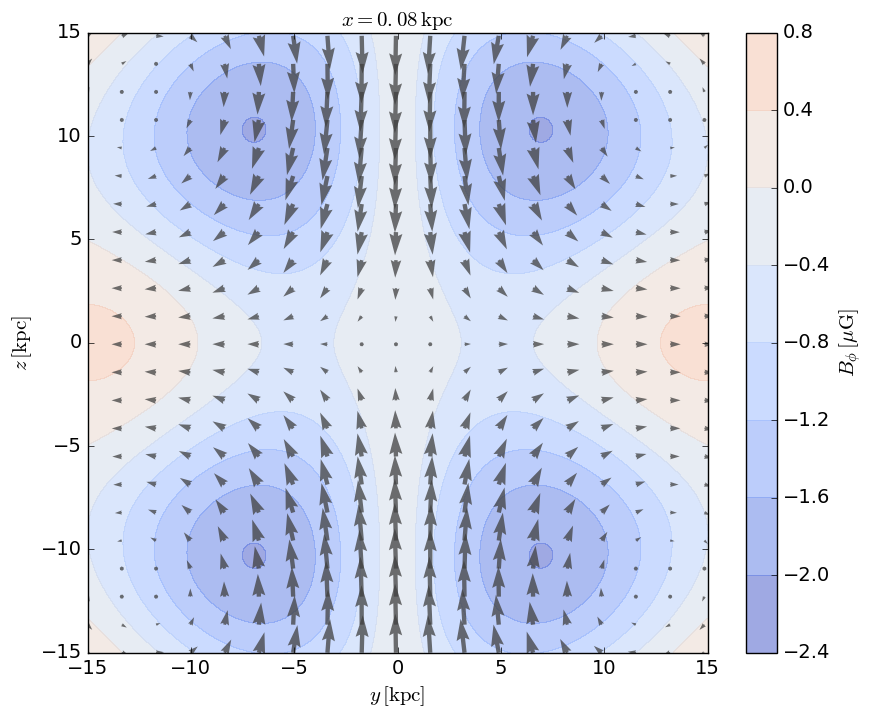

In [13]:
figure(figsize=(10,8.)); imid =100
plot_y_z(B, ix=imid, skipz=9, skipy=11, 
         cmap='coolwarm', width=0.007, vmin=-2.3,vmax=2.3)   
title(r'$x={0:.2f}\,\rm kpc$'.format(B.grid.x[imid,imid,imid]))
savefig('fig/yz_halo.png')

![http://www.mas.ncl.ac.uk/~nlfsr/Talks/201703_LorentzCenter/fig/yz_halo.png](http://www.mas.ncl.ac.uk/~nlfsr/Talks/201703_LorentzCenter/fig/yz_halo.png)

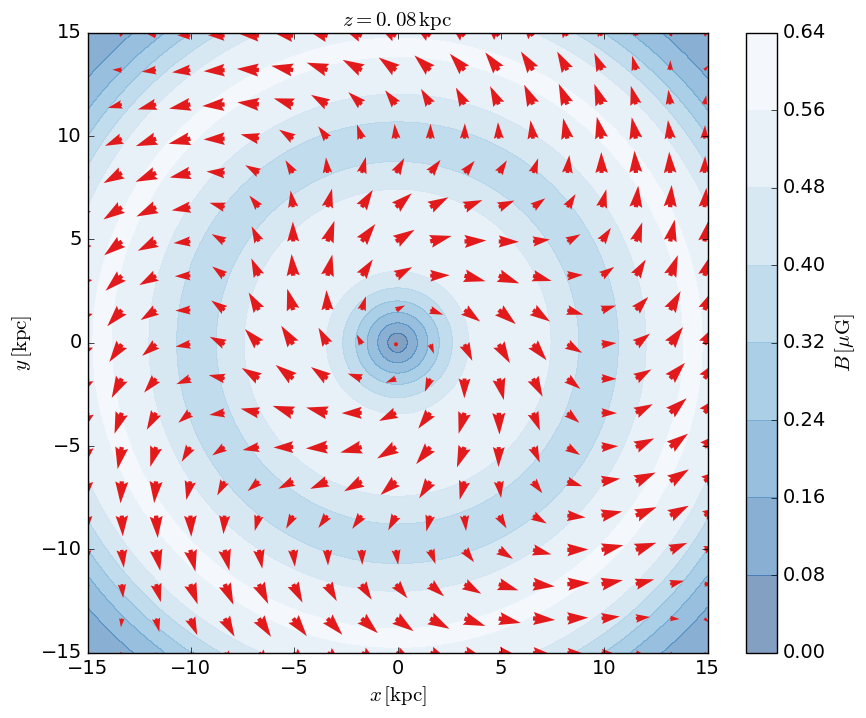

In [14]:
figure(figsize=(10,8.))
plot_x_y(B, iz=imid, field_lines=False, skipx=11, skipy=11, 
         quiver_color='#e31a1c', width=0.007, cmap='Blues_r')
title(r'$z={0:.2f}\,\rm kpc$'.format(B.grid.z[imid,imid,imid]))
savefig('fig/xy_halo.png')

![http://www.mas.ncl.ac.uk/~nlfsr/Talks/201703_LorentzCenter/fig/yz_halo.png](http://www.mas.ncl.ac.uk/~nlfsr/Talks/201703_LorentzCenter/fig/xy_halo.png)

It is easy to acces the growth rate of this solution and the specific choice of coefficients made

In [15]:
B.halo.parameters['halo_field_coefficients']

array([-0.38639955, -0.38639955,  0.10385753, -0.5945359 ])

In [16]:
B.halo.parameters['halo_field_growth_rate'].real

2.4205907200362549

In [17]:
box_limits = [[-15, 15],[-15, 15],[-15, 15]] # kpc
box_resolution = [200,200,200]
B2 = B_field(box_limits, box_resolution)

# Using the previously defined B object
B2.add_halo_field(
    halo_ref_radius = 9, #kpc
    halo_ref_z = 0.02, #kpc
    halo_ref_Bphi = -0.1, # muG at the ref point
    halo_symmetric_field = True, # Symmetric
    halo_turbulent_induction = 13.0, # R_alpha
    halo_rotation_induction = 200.0  # R_omega
    )

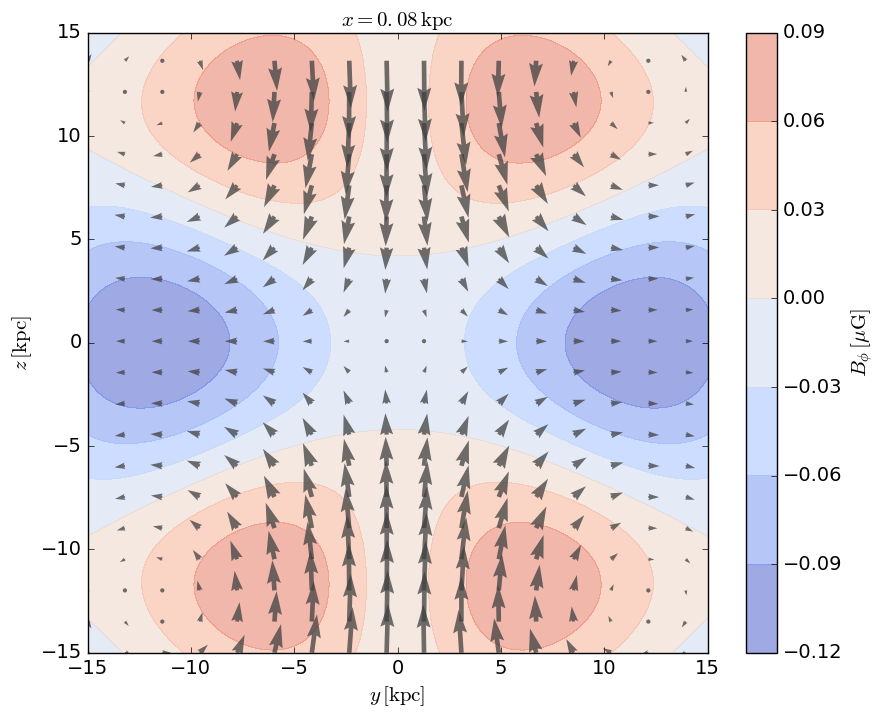

In [18]:
figure(figsize=(10,8.)); imid =100
plot_y_z(B2, ix=imid, skipz=10, skipy=12, 
         cmap='coolwarm', width=0.0075, vmin=-0.11,vmax=0.11)   
title(r'$x={0:.2f}\,\rm kpc$'.format(B.grid.x[imid,imid,imid]))
savefig('fig/yz_haloalt.png')

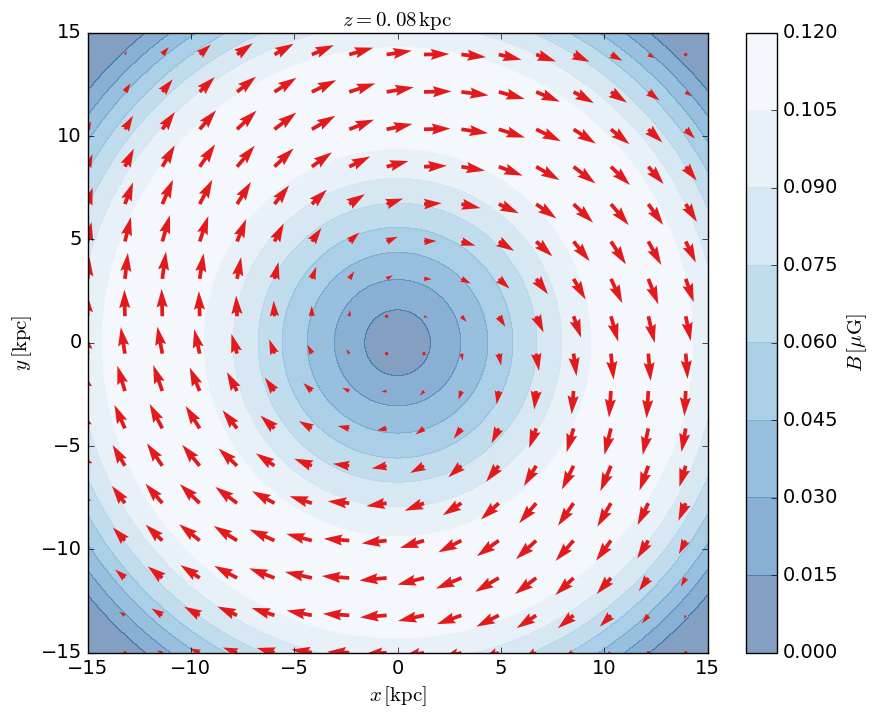

In [ ]:
figure(figsize=(10,8.))
plot_x_y(B2, iz=imid, field_lines=False, skipx=12, skipy=12, 
         quiver_color='#e31a1c', width=0.006, cmap='Blues_r')
title(r'$z={0:.2f}\,\rm kpc$'.format(B.grid.z[imid,imid,imid]))
savefig('fig/xy_haloalt.png')

Let us look at another example, this time with $R_\alpha=13$

![xy_haloalt](http://www.mas.ncl.ac.uk/~nlfsr/Talks/201703_LorentzCenter/fig/xy_haloalt.png)


![xz_haloalt](http://www.mas.ncl.ac.uk/~nlfsr/Talks/201703_LorentzCenter/fig/xz_haloalt.png)

The field can also be anti-symmetric with respect to the midplane

In [ ]:
box_limits = [[-15, 15],[-15, 15],[-15, 15]] # kpc
box_resolution = [200,200,200]
Ba = B_field(box_limits, box_resolution)

# Using the previously defined B object
Ba.add_halo_field(
    halo_ref_radius = 9, #kpc
    halo_ref_z = 0.02, #kpc
    halo_ref_Bphi = 0.01, # muG at the ref point
    halo_symmetric_field = False, # Symmetric
    halo_turbulent_induction = 20.0, # R_alpha
    halo_rotation_induction = 200.0  # R_omega
    )

In [ ]:
figure(figsize=(10,8.)); imid =100
plot_y_z(Ba, ix=imid, skipz=9, skipy=11, 
         cmap='coolwarm', width=0.0075)#, vmin=-0.11,vmax=0.11)   
title(r'$x={0:.2f}\,\rm kpc$'.format(B2.grid.x[imid,imid,imid]))
savefig('fig/yz_halo_anti.png')

figure(figsize=(10,8.))
plot_x_y(Ba, iz=imid, field_lines=False, skipx=11, skipy=11, 
         quiver_color='#e31a1c', width=0.006, cmap='Blues_r')
title(r'$z={0:.2f}\,\rm kpc$'.format(B2.grid.z[imid,imid,imid]))
savefig('fig/xy_halo_anti.png')

![yz_halo_anti](http://www.mas.ncl.ac.uk/~nlfsr/Talks/201703_LorentzCenter/fig/yz_halo_anti.png)


![yz_halo_anti](http://www.mas.ncl.ac.uk/~nlfsr/Talks/201703_LorentzCenter/fig/xy_halo_anti.png)

## Halo + disk solutions ##


In [ ]:
box_limits = [[-15, 15],[-15, 15],[-1.5, 1.5]] # kpc
box_resolution = [200,200,200]
B = B_field(box_limits, box_resolution)

B.add_halo_field(
    halo_ref_radius = 9, #kpc
    halo_ref_z = 0.02, #kpc
    halo_ref_Bphi = -0.25, # muG at the ref point
    halo_symmetric_field = True, # Symmetric
    halo_turbulent_induction = 9.0, # R_alpha
    halo_rotation_induction = 200.0  # R_omega
    )

B.add_disk_field(
    reversals=[6.], # Requires a reversal at 6 kpc 
    B_phi_solar_radius = -3, # muG 
    number_of_modes = 2, # Minimum number of modes to be used
    disk_dynamo_number = -20,
    disk_turbulent_induction = 0.6,
    disk_height = 0.6, # kpc
    disk_radius =15)

In [ ]:
figure(figsize=(10,3.)); imid =100
plot_y_z(B.disk, ix=imid, skipz=9, skipy=8, cmap='coolwarm', width=0.0065, vmin=-6,vmax=6)   
title(r'disk$\quad - \quad x={0:.2f}\,\rm kpc$'.format(B.grid.x[imid,imid,imid]))
savefig('fig/combined_disk.png')
figure(figsize=(10,3.)); imid =100
plot_y_z(B.halo, ix=imid, skipz=9, skipy=8, cmap='coolwarm', width=0.0065, vmin=-3,vmax=3)   
title(r'halo$\quad - \quad x={0:.2f}\,\rm kpc$'.format(B.grid.x[imid,imid,imid]))
savefig('fig/combined_halo.png')
figure(figsize=(10,3.)); imid =100
plot_y_z(B,      ix=imid, skipz=9, skipy=8, cmap='coolwarm', width=0.0065, vmin=-6,vmax=6)   
title(r'$x={0:.2f}\,\rm kpc$'.format(B.grid.x[imid,imid,imid]))
savefig('fig/combined.png')


figure(figsize=(13,9.))
subplot(2,2,1)
plot_x_y(B.disk, iz=imid, field_lines=False, skipx=11, skipy=11, 
         quiver_color='#e31a1c', width=0.006, cmap='Blues_r')
title(r'disc - $z={0:.2f}\,\rm kpc$'.format(B2.grid.z[imid,imid,imid]))
subplot(2,2,2)
#figure(figsize=(6,4.))

plot_x_y(B.halo, iz=imid, field_lines=False, skipx=11, skipy=11, 
         quiver_color='#e31a1c', width=0.006, cmap='Blues_r')
title(r'halo - $z={0:.2f}\,\rm kpc$'.format(B2.grid.z[imid,imid,imid]))
subplot(2,2,3)
#figure(figsize=(6,4))
plot_x_y(B, iz=imid, field_lines=False, skipx=11, skipy=11, 
         quiver_color='#e31a1c', width=0.006, cmap='Blues_r')
title(r'halo+disc - $z={0:.2f}\,\rm kpc$'.format(B2.grid.z[imid,imid,imid]))
tight_layout()
savefig('fig/xy_combined.png')

![halo field](http://www.mas.ncl.ac.uk/~nlfsr/Talks/201703_LorentzCenter/fig/combined_halo.png)

![halo field](http://www.mas.ncl.ac.uk/~nlfsr/Talks/201703_LorentzCenter/fig/combined.png)

![halo field](http://www.mas.ncl.ac.uk/~nlfsr/Talks/201703_LorentzCenter/fig/xy_combined.png)


In [ ]:
B.add_disk_field(
    reversals=[3,10], # Requires 2 reversals at 4.7 kpc and 12.25
    B_phi_solar_radius = -3, # muG 
    number_of_modes = 4, # Number of radial modes
    disk_dynamo_number = -20,
    disk_turbulent_induction = 0.6,
    disk_height = 0.4, # kpc
    disk_radius =15
    )    

figure(figsize=(10,3.)); imid =100
plot_y_z(B.disk, ix=imid, skipz=9, skipy=8, cmap='coolwarm', width=0.0065, vmin=-6,vmax=6)   
title(r'disk$\quad - \quad x={0:.2f}\,\rm kpc$'.format(B.grid.x[imid,imid,imid]))
savefig('fig/combined_disk.png')
figure(figsize=(10,3.)); imid =100
plot_y_z(B.halo, ix=imid, skipz=12, skipy=8, cmap='coolwarm', width=0.0065, vmin=-3,vmax=3)   
title(r'halo$\quad - \quad x={0:.2f}\,\rm kpc$'.format(B.grid.x[imid,imid,imid]))
savefig('fig/combined_halo.png')
figure(figsize=(10,3.)); imid =100
plot_y_z(B,      ix=imid, skipz=12, skipy=8, cmap='coolwarm', width=0.0065, vmin=-6,vmax=6)   
title(r'$x={0:.2f}\,\rm kpc$'.format(B.grid.x[imid,imid,imid]))
savefig('fig/combined_2rev.png')


figure(figsize=(13,9.))
subplot(2,2,1)
title('disc')
plot_x_y(B.disk, iz=imid, field_lines=False, skipx=11, skipy=11, 
         quiver_color='#e31a1c', width=0.006, cmap='Blues_r')
title(r'$z={0:.2f}\,\rm kpc$'.format(B2.grid.z[imid,imid,imid]))
subplot(2,2,2)
#figure(figsize=(6,4.))
title('halo')
plot_x_y(B.halo, iz=imid, field_lines=False, skipx=11, skipy=11, 
         quiver_color='#e31a1c', width=0.006, cmap='Blues_r')
title(r'$z={0:.2f}\,\rm kpc$'.format(B2.grid.z[imid,imid,imid]))
subplot(2,2,3)
#figure(figsize=(6,4))
title('halo+disc')
plot_x_y(B, iz=imid, field_lines=False, skipx=11, skipy=11, 
         quiver_color='#e31a1c', width=0.006, cmap='Blues_r')
title(r'$z={0:.2f}\,\rm kpc$'.format(B2.grid.z[imid,imid,imid]))
tight_layout()
savefig('fig/xy_combined_2rev.png')

If we switch back to the two reversals field example from the beginning

![halo field](http://www.mas.ncl.ac.uk/~nlfsr/Talks/201703_LorentzCenter/fig/combined_2rev.png)

![halo field](http://www.mas.ncl.ac.uk/~nlfsr/Talks/201703_LorentzCenter/fig/xy_combined_2rev.png)

## Conclusions ##

* Mean field dynamo solutions for the halo and the disc 
* Available and free to use at http://bitbucket.org/luizfelippe/galmag

### Possible extensions
* Non-axisymmetry 
* Random field

### Applications
* A simple(r) GMF model to test/play with?
* Prior to IMAGINE?



